In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import json

In [ ]:
!pip install kaggle
kaggle_set=json.load(open("kaggle.json"))
os.environ['KAGGLE_USERNAME']=kaggle_set["username"]
os.environ['KAGGLE_KEY']=kaggle_set["key"]
!kaggle datasets download -d sanadalali/food-101-nutritional-information

Dataset URL: https://www.kaggle.com/datasets/sanadalali/food-101-nutritional-information
License(s): CC0-1.0
food-101-nutritional-information.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
with ZipFile('food-101-nutritional-information.zip','r') as zip:
    zip.extractall()

In [ ]:
df=pd.read_csv("/content/nutrition.csv")

In [ ]:
df.head(20)

,label,weight,calories,protein,carbohydrates,fats,fiber,sugars,sodium
0,apple_pie,80,240,2,36,10,2,16,120
1,apple_pie,100,300,3,45,12,2,20,150
2,apple_pie,120,360,4,54,14,3,24,180
3,apple_pie,150,450,5,68,18,3,30,225
4,apple_pie,200,600,6,90,24,4,40,300
5,baby_back_ribs,150,540,38,15,33,1,12,720
6,baby_back_ribs,200,720,50,20,44,2,16,960
7,baby_back_ribs,250,900,63,25,55,2,20,1200
8,baby_back_ribs,300,1080,75,30,66,3,24,1440
9,baby_back_ribs,350,1260,88,35,77,3,28,1680


In [ ]:
df.shape

(505, 9)

In [ ]:
df.tail(20)

,label,weight,calories,protein,carbohydrates,fats,fiber,sugars,sodium
485,takoyaki,100,200,8,25,8,1,5,300
486,takoyaki,150,300,12,38,12,2,8,450
487,takoyaki,200,400,16,50,16,3,10,600
488,takoyaki,250,500,20,63,20,4,13,750
489,takoyaki,300,600,24,75,24,5,15,900
490,tiramisu,100,300,6,30,15,1,20,100
491,tiramisu,150,450,9,45,23,2,30,150
492,tiramisu,200,600,12,60,30,3,40,200
493,tiramisu,250,750,15,75,38,4,50,250
494,tiramisu,300,900,18,90,45,5,60,300


In [ ]:
df.isnull().sum()

,0
label,0
weight,0
calories,0
protein,0
carbohydrates,0
fats,0
fiber,0
sugars,0
sodium,0


In [ ]:
df['label'].describe()

,label
count,505
unique,101
top,apple_pie
freq,5


In [ ]:
df.describe()

,weight,calories,protein,carbohydrates,fats,fiber,sugars,sodium
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,227.207921,481.380198,21.215842,41.863366,23.689109,3.310891,12.708911,595.849505
std,102.593000,230.066679,16.294869,30.577431,14.782295,2.587435,16.656319,373.087777
min,50.000000,50.000000,2.000000,0.000000,1.000000,0.000000,0.000000,10.000000
25%,150.000000,300.000000,9.000000,18.000000,12.000000,1.000000,3.000000,300.000000
50%,200.000000,450.000000,16.000000,38.000000,20.000000,3.000000,6.000000,600.000000
75%,300.000000,600.000000,30.000000,60.000000,30.000000,5.000000,15.000000,875.000000
max,700.000000,1260.000000,88.000000,150.000000,90.000000,15.000000,105.000000,1867.000000


<Axes: xlabel='sugars', ylabel='sodium'>

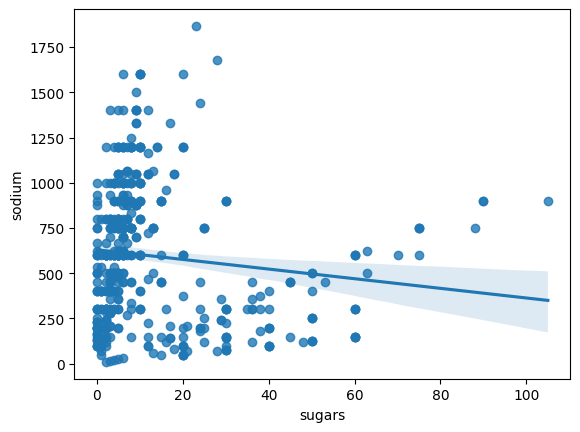

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x="sugars", y="sodium",data=df)

In [ ]:
def encode_calorie_score(calories):
    if calories > 300:
        return 0
    elif 200 <= calories <= 300:
        return 1
    else:
        return 2

df['Calorie_Score'] = df['calories'].apply(encode_calorie_score)

def encode_fat(fats):
    if fats > 10:
        return 0
    elif 5 <= fats <= 10:
        return 1
    else:
        return 2

df['fat_Score'] = df['fats'].apply(encode_fat)

def encode_sodium(sodium):
    if sodium > 1000:
        return 0
    elif 500 <= sodium <= 1000:
        return 1
    else:
        return 2

df['sodium_Score'] = df['sodium'].apply(encode_sodium)


In [ ]:
df.tail(50)

,label,weight,calories,protein,carbohydrates,fats,fiber,sugars,sodium,Calorie_Score,fat_Score,sodium_Score
455,spaghetti_carbonara,200,400,15,45,18,2,4,500,0,0,1
456,spaghetti_carbonara,250,500,19,56,23,3,5,625,0,0,1
457,spaghetti_carbonara,300,600,23,68,27,4,6,750,0,0,1
458,spaghetti_carbonara,350,700,26,79,32,5,7,875,0,0,1
459,spaghetti_carbonara,400,800,30,90,36,6,8,1000,0,0,1
460,spring_rolls,50,100,3,15,4,1,2,150,2,2,2
461,spring_rolls,70,140,4,21,6,1,3,210,2,1,2
462,spring_rolls,100,200,6,30,8,2,4,300,1,1,2
463,spring_rolls,120,240,7,36,10,2,5,360,1,1,2
464,spring_rolls,150,300,9,45,12,3,6,450,1,0,2


In [ ]:
df['fat_Score'].value_counts()

,count
fat_Score,
0,405
1,83
2,17


In [ ]:
df['sodium_Score'].value_counts()

,count
sodium_Score,
1,224
2,215
0,66


In [ ]:
def encode_fiber(fiber):
    if fiber < 2 :
        return 0
    elif 2 <= fiber <= 5:
        return 1
    else:
        return 2

df['fiber_score'] = df['fiber'].apply(encode_fiber)

def encode_sugar(sugars):
    if sugars > 10:
        return 0
    elif 5 <= sugars <= 10:
        return 1
    else:
        return 2

df['sugar_score'] = df['sugars'].apply(encode_sugar)

def encode_protein(protein):
    if protein < 5:
        return 0
    elif 5 <= protein <= 10:
        return 1
    else:
        return 2

df['protein_Score'] = df['protein'].apply(encode_protein)

In [ ]:
df.head(60)

,label,weight,calories,protein,carbohydrates,fats,fiber,sugars,sodium,Calorie_Score,fat_Score,sodium_Score,fiber_score,sugar_score,protein_Score
0,apple_pie,80,240,2,36,10,2,16,120,1,1,2,1,0,0
1,apple_pie,100,300,3,45,12,2,20,150,1,0,2,1,0,0
2,apple_pie,120,360,4,54,14,3,24,180,0,0,2,1,0,0
3,apple_pie,150,450,5,68,18,3,30,225,0,0,2,1,0,1
4,apple_pie,200,600,6,90,24,4,40,300,0,0,2,1,0,1
5,baby_back_ribs,150,540,38,15,33,1,12,720,0,0,1,0,0,2
6,baby_back_ribs,200,720,50,20,44,2,16,960,0,0,1,1,0,2
7,baby_back_ribs,250,900,63,25,55,2,20,1200,0,0,0,1,0,2
8,baby_back_ribs,300,1080,75,30,66,3,24,1440,0,0,0,1,0,2
9,baby_back_ribs,350,1260,88,35,77,3,28,1680,0,0,0,1,0,2


In [ ]:
# Assuming you've already created these columns using pd.cut or a scoring function:
# Calorie_Score, Fat_Score, Sugar_Score, Sodium_Score, Protein_Score, Fiber_Score

df['Total_Score'] = (
    df['Calorie_Score'] +
    df['fat_Score'] +
    df['sugar_score'] +
    df['sodium_Score'] +
    df['protein_Score'] +
    df['fiber_score']
)

# Assuming you've already created these columns using pd.cut or a scoring function:
# Calorie_Score, Fat_Score, Sugar_Score, Sodium_Score, Protein_Score, Fiber_Score

df['Total_Score'] = (
    df['Calorie_Score'] +
    df['fat_Score'] +
    df['sugar_score'] +
    df['sodium_Score'] +
    df['protein_Score'] +
    df['fiber_score']
)

# Classify as good or bad or moderate
df['Health_Label'] = df['Total_Score'].apply(
    lambda x: 'Good' if x >= 7 else ('Moderate' if x >= 5 else 'Bad'))

In [ ]:
df.head(30)

,label,weight,calories,protein,carbohydrates,fats,fiber,sugars,sodium,Calorie_Score,fat_Score,sodium_Score,fiber_score,sugar_score,protein_Score,Total_Score,Health_Label
0,apple_pie,80,240,2,36,10,2,16,120,1,1,2,1,0,0,5,Moderate
1,apple_pie,100,300,3,45,12,2,20,150,1,0,2,1,0,0,4,Bad
2,apple_pie,120,360,4,54,14,3,24,180,0,0,2,1,0,0,3,Bad
3,apple_pie,150,450,5,68,18,3,30,225,0,0,2,1,0,1,4,Bad
4,apple_pie,200,600,6,90,24,4,40,300,0,0,2,1,0,1,4,Bad
5,baby_back_ribs,150,540,38,15,33,1,12,720,0,0,1,0,0,2,3,Bad
6,baby_back_ribs,200,720,50,20,44,2,16,960,0,0,1,1,0,2,4,Bad
7,baby_back_ribs,250,900,63,25,55,2,20,1200,0,0,0,1,0,2,3,Bad
8,baby_back_ribs,300,1080,75,30,66,3,24,1440,0,0,0,1,0,2,3,Bad
9,baby_back_ribs,350,1260,88,35,77,3,28,1680,0,0,0,1,0,2,3,Bad


In [ ]:
df.shape

(505, 17)

In [ ]:
df['Health_Label'].value_counts()

,count
Health_Label,
Moderate,258
Bad,139
Good,108


0---->BAD



1---->MODERATE


2---->GOOD

In [ ]:
df['Health_Label']=df['Health_Label'].replace({'Bad':0,'Moderate':1,'Good':2})
df.head(20)

<ipython-input-53-7815e07327ce>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Health_Label']=df['Health_Label'].replace({'Bad':0,'Moderate':1,'Good':2})


,label,weight,calories,protein,carbohydrates,fats,fiber,sugars,sodium,Calorie_Score,fat_Score,sodium_Score,fiber_score,sugar_score,protein_Score,Total_Score,Health_Label
0,apple_pie,80,240,2,36,10,2,16,120,1,1,2,1,0,0,5,1
1,apple_pie,100,300,3,45,12,2,20,150,1,0,2,1,0,0,4,0
2,apple_pie,120,360,4,54,14,3,24,180,0,0,2,1,0,0,3,0
3,apple_pie,150,450,5,68,18,3,30,225,0,0,2,1,0,1,4,0
4,apple_pie,200,600,6,90,24,4,40,300,0,0,2,1,0,1,4,0
5,baby_back_ribs,150,540,38,15,33,1,12,720,0,0,1,0,0,2,3,0
6,baby_back_ribs,200,720,50,20,44,2,16,960,0,0,1,1,0,2,4,0
7,baby_back_ribs,250,900,63,25,55,2,20,1200,0,0,0,1,0,2,3,0
8,baby_back_ribs,300,1080,75,30,66,3,24,1440,0,0,0,1,0,2,3,0
9,baby_back_ribs,350,1260,88,35,77,3,28,1680,0,0,0,1,0,2,3,0


In [ ]:
x=df.drop(columns=['Health_Label','label'],axis=1)
y=df['Health_Label']
print(x)
print(y)

     weight  calories  protein  carbohydrates  fats  fiber  sugars  sodium  \
0        80       240        2             36    10      2      16     120   
1       100       300        3             45    12      2      20     150   
2       120       360        4             54    14      3      24     180   
3       150       450        5             68    18      3      30     225   
4       200       600        6             90    24      4      40     300   
..      ...       ...      ...            ...   ...    ...     ...     ...   
500     100       300        6             40    12      2      10     300   
501     150       450        9             60    18      3      15     450   
502     200       600       12             80    24      4      20     600   
503     250       750       15            100    30      5      25     750   
504     300       900       18            120    36      6      30     900   

     Calorie_Score  fat_Score  sodium_Score  fiber_score  sugar

In [ ]:
x.head()


,weight,calories,protein,carbohydrates,fats,fiber,sugars,sodium,Calorie_Score,fat_Score,sodium_Score,fiber_score,sugar_score,protein_Score,Total_Score
0,80,240,2,36,10,2,16,120,1,1,2,1,0,0,5
1,100,300,3,45,12,2,20,150,1,0,2,1,0,0,4
2,120,360,4,54,14,3,24,180,0,0,2,1,0,0,3
3,150,450,5,68,18,3,30,225,0,0,2,1,0,1,4
4,200,600,6,90,24,4,40,300,0,0,2,1,0,1,4


In [ ]:
'''from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x['label'] = label_encoder.fit_transform(x['label'])
x.drop()'''

"from sklearn.preprocessing import LabelEncoder\n\nlabel_encoder = LabelEncoder()\nx['label'] = label_encoder.fit_transform(x['label'])\nx.drop()"

In [ ]:
import joblib
scaler=StandardScaler()
scaler.fit(x)
sdata=scaler.transform(x)
print(sdata)

joblib.dump(scaler,'scaler_diet.pkl')

x=sdata
y=df['Health_Label']
print(x)
print(y)

[[-1.43629573 -1.05021529 -1.1804265  ... -1.32244214 -2.5825794
  -0.31342227]
 [-1.24115735 -0.78916274 -1.11899664 ... -1.32244214 -2.5825794
  -0.97845691]
 [-1.04601897 -0.52811018 -1.05756677 ... -1.32244214 -2.5825794
  -1.64349155]
 ...
 [-0.26546547  0.51610004 -0.56612788 ... -1.32244214  0.63767393
  -0.97845691]
 [ 0.22238047  1.16873143 -0.38183829 ... -1.32244214  0.63767393
  -0.97845691]
 [ 0.7102264   1.82136282 -0.19754871 ... -1.32244214  0.63767393
  -0.31342227]]
[[-1.43629573 -1.05021529 -1.1804265  ... -1.32244214 -2.5825794
  -0.31342227]
 [-1.24115735 -0.78916274 -1.11899664 ... -1.32244214 -2.5825794
  -0.97845691]
 [-1.04601897 -0.52811018 -1.05756677 ... -1.32244214 -2.5825794
  -1.64349155]
 ...
 [-0.26546547  0.51610004 -0.56612788 ... -1.32244214  0.63767393
  -0.97845691]
 [ 0.22238047  1.16873143 -0.38183829 ... -1.32244214  0.63767393
  -0.97845691]
 [ 0.7102264   1.82136282 -0.19754871 ... -1.32244214  0.63767393
  -0.31342227]]
0      1
1      0
2   

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)
print(x.shape,xtrain.shape,xtest.shape)

(505, 15) (353, 15) (152, 15)


In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
model=svm.SVC()
model.fit(xtrain,ytrain)

xtrain_acc_prediction=model.predict(xtrain)
training_data_acc=accuracy_score(xtrain_acc_prediction,ytrain)
print('Accuracy Score of training data:',training_data_acc)

xtest_acc_prediction=model.predict(xtest)
testing_data_acc=accuracy_score(xtest_acc_prediction,ytest)
print('Accuracy Score of testing data:',testing_data_acc)

print(classification_report(ytest,xtest_acc_prediction))

# For training data
train_rmse = np.sqrt(mean_squared_error(ytrain, xtrain_acc_prediction))
print('Training RMSE:', train_rmse)

# For testing data
test_rmse = np.sqrt(mean_squared_error(ytest, xtest_acc_prediction))
print('Testing RMSE:', test_rmse)

Accuracy Score of training data: 0.9915014164305949
Accuracy Score of testing data: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      0.97      0.97        78
           2       0.94      0.94      0.94        32

    accuracy                           0.97       152
   macro avg       0.97      0.97      0.97       152
weighted avg       0.97      0.97      0.97       152

Training RMSE: 0.09218776257945031
Testing RMSE: 0.16222142113076254


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_l=LogisticRegression()
model_l.fit(xtrain,ytrain)

xtrain_acc_prediction=model_l.predict(xtrain)
training_data_acc=accuracy_score(xtrain_acc_prediction,ytrain)
print('Accuracy Score of training data:',training_data_acc)

xtest_acc_prediction=model_l.predict(xtest)
testing_data_acc=accuracy_score(xtest_acc_prediction,ytest)
print('Accuracy Score of testing data:',testing_data_acc)

print(classification_report(ytest,xtest_acc_prediction))

train_rmse = np.sqrt(mean_squared_error(ytrain, xtrain_acc_prediction))
print('Training RMSE:', train_rmse)

# For testing data
test_rmse = np.sqrt(mean_squared_error(ytest, xtest_acc_prediction))
print('Testing RMSE:', test_rmse)

Accuracy Score of training data: 0.9971671388101983
Accuracy Score of testing data: 0.993421052631579
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.99      1.00      0.99        78
           2       1.00      0.97      0.98        32

    accuracy                           0.99       152
   macro avg       1.00      0.99      0.99       152
weighted avg       0.99      0.99      0.99       152

Training RMSE: 0.05322462954123495
Testing RMSE: 0.08111071056538127


In [ ]:
joblib.dump(model,'model_diet.pkl')

['model_diet.pkl']

In [ ]:
joblib.dump(model_l,'model_diet_l.pkl')

['model_diet_l.pkl']